# Potenzreihen und Taylor-Polynome

Polynome haben schöne Eigenschaften, vor allem sind sie einfach abzuleiten oder zu integrieren. In der Praxis ist es daher oft sinnvoll, "schwierige" Funktionen durch Polynome zu ersetzen, auch wenn man dafür Fehler macht.

Diese Vorgehensweise wird **Approximation** genannt, zu deutsch Annäherung. Für Zahlen haben Sie dies schon kennengelernt. Wenn Sie beispielsweise den Flächeninhalt $A$ eines Kreises mit Radius $r = 3 m$ berechnen wollen, so gilt $A = \pi \cdot r^2 = 9\pi$. Da aber $\pi$ unendlich viele Nachkommastellen hat, legen Sie fest, wie genau die Annäherung an den wahren Flächeninhalt sein soll, indem Sie die Anzahl der Nachkommastellen festlegen. Reichen Ihnen beispielsweise 2 Nachkommastellen, also $\pi \approx 3,14$, so erhalten Sie $A = 28.27 m^2$.

Jetzt wollen wir Funktionen approximieren. Betrachten wir beispielsweise die Sinus-Funktion. Zuerst müssen wir aber einige technischen Vorbereitungen treffen und das Python-Modul für symbolische Berechnungen laden. Bitte führen Sie die nachfolgende Code-Zelle aus, indem in die Zelle klicken und dann oben in der Menüleiste auf `Run` klicken.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use('seaborn')
from sympy import * 

init_printing()
x = symbols('x')
f = Function('f')

Jetzt können wir die den Graph der Sinus-Funktion zeichnen: 

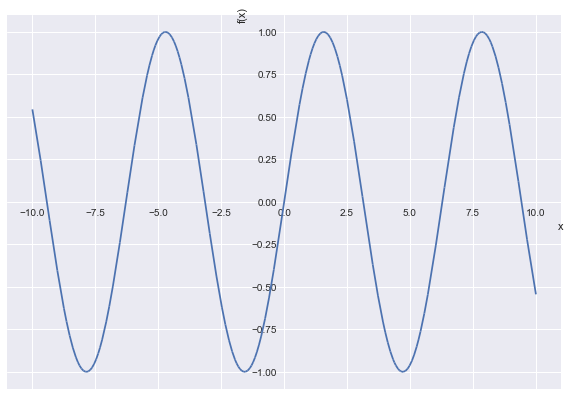

In [2]:
f = sin(x)
graph = plot(f)

Gerade im Bereich $x = 0$ wirkt der Sinus linear, wie eine Gerade. Probieren wir es und zeichnen noch die Funktion $T_{1}(x)= x$ dazu:

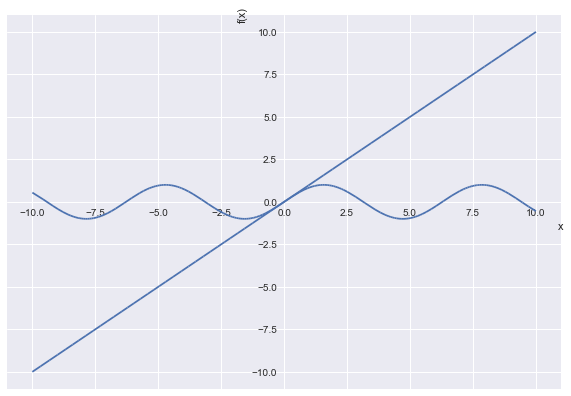

In [3]:
T1 = x
graph1 = plot(f, T1)

Und hier noch einmal stärker hereingezoomt, sprich die Sinus-Funktion und die Gerade $T_{1}(x) = x$ im Intervall $[-1,1]$.

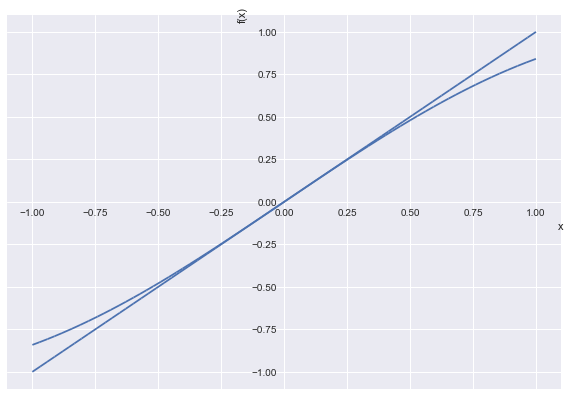

In [4]:
graph1 = plot(f, T1, (x, -1, 1))

Besser wird unsere Approximation, wenn wir noch einen kubischen Term ergänzen:

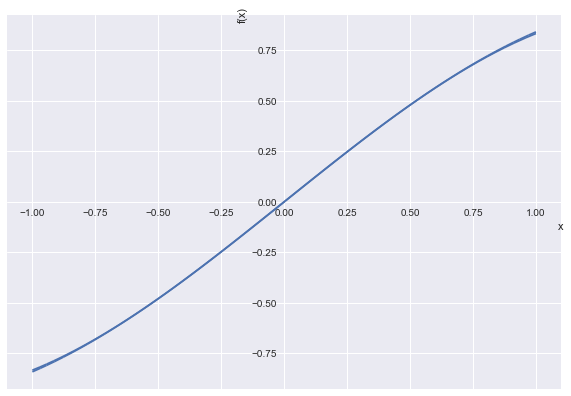

In [5]:
T2 = x - 1/6 * x**3
graph2 = plot(f, T2, (x, -1, 1))

Solange ich mich also im Bereich $x\in[-1,1]$ befinde (das ist ungefähr $\alpha \in [-57^{\circ}, +57^{\circ}]$, kann es einfacher sein, die Sinus-Funktion durch $x - \frac{1}{6}x^3$ zu ersetzen. Je weiter ich mich von der Stelle $x_0=0$ entferne, desto größer wird jedoch mein Fehler:

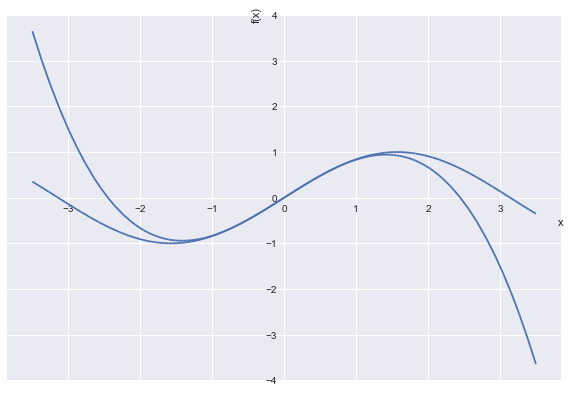

In [6]:
graph2 = plot(f, T2, (x, -3.5, 3.5))

Tatsächlich liegen die Funktionswerte der Sinus-Funktion zwischen -1 und 1, wohingegen $T_{2}(x) = x - \frac{1}{6}x^3$ ins Unendliche verschwindet.

#### Fragen

> 1. Gibt es einen systematischen Weg, zu einer gegebenen Funktion eine Approximation mit Polynomen zu berechnen?
> 2. Gilt diese Approximation für alle x-Werte oder nur in einem Bereich?
> 3. Wie groß ist der Fehler, den ich mache, wenn ich die Approximation verwende?

Eine Video von Studyflix zu Potenzreihen und dem sogenannten Konvergenzradius (s.u.) finden Sie hier: https://studyflix.de:/mathematik/potenzreihen-909

Im Folgenden starten wir immer von einem Punkt $x_0$, für den die Approximation perfekt sein soll. Im obigen Beispiel mit der Sinus-Funktion war das $x_0 = 0$. Dabei wird $x_0$ der **Entwicklungspunkt** oder das **Entwicklungszentrum** genannt. Ist die Funktion $f$ genügend oft ableitbar/differenzierbar, so können wir folgendermaßen vorgehen:

#### Formel zur Berechnung der Taylorschen Reihe
$f(x) = f(x_0) + \frac{f'(x_0)}{1!}(x-x_0)^1 + \frac{f''(x_0)}{2!}(x-x_0)^2 + \frac{f'''(x_0)}{3!}(x-x_0)^3 + \ldots = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$ 
Wenn man nach dem n-ten Glied abbricht, sagt man auch **Taylor-Polynom der Ordnung n**. 

Video von Studyflix zu Taylor-Reihen: https://studyflix.de/mathematik/taylorreihen-910


#### Konvergenzradius

Die Taylor-Reihe ist nur ein Spezialfall für allgemeine Potenzreihen, also Reihen nach dem Schema $p(x) = \sum_{k=0}^{\infty} a_k (x-x_0)^{k}$. Aber nicht jede Reihe stellt auch für alle reellen Zahlen $x$ eine gültige Funktion dar. Manchmal sind alle reellen Zahlen erlaubt, manchmal nur ein Intervall. Falls aber nur ein Intervall gültig ist, dann ist dieses Intervall symmetrisch um den Entwicklungspunkt $x_0$ und wird mit dem **Konvergenzradius** angegeben:

Der Konvergenzradius $r\geq 0$ einer Potenzreihe ist eine nicht-negative Zahl mit der Eigenschaft, dass die Potenzreihe für alle $x$ mit $|x-x_0|< r$ konvergiert und für alle $x$ mit $|x-x_0|>r$ divergiert. Eine Potenzreihe, die für alle reellen Zahlen $x$ konvergiert, hat einen unendlichen Konvergenzradius $r = \infty$.

Der Konvergenzradius lässt sich aus den Koeffizienten der Potenzreihe ermitteln:
* Quotientenkriterium: $r = \lim_{k\rightarrow\infty} \big|\frac{a_k}{a_{k+1}}\big|$ 
* Wurzelkriterium: $r = \lim_{k\rightarrow\infty}\frac{1}{\sqrt[k]{|a_k|}}$ 

Im schlimmsten Fall ist der Konvergenzradius 0. Dann konvergiert die Potenzreihe nur für $x_0$.

#### Abschätzung des Fehlers

Der Fehler $f(x) - T_{n}(x)$, den man macht, wenn man nach dem n-ten Term sie Approximation abbricht, kann man über das sogenannte Taylor-Restglied

$R_{n}(x) = \frac{f^{(n+1)}(z)}{(n+1)!}(x-x_0)^{n+1}$

abschätzen. Dabei ist $z$ eine Stelle zwischen $x$ und $x_0$, von der man allerdings nicht genau weiß, wo sie liegt. Daher sucht man in dem Bereich zwischen $x$ und $x_0$ das Maximum und nimmt das als größten Fehler.

Video bei Studyflix: https://studyflix.de/mathematik/taylorreihen-landausymbol-911

# Übungen

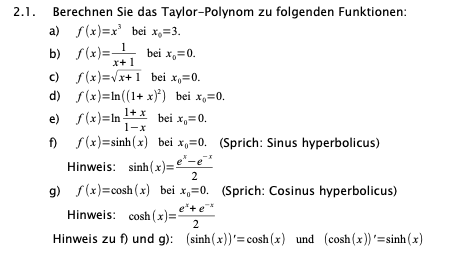

Wir berechnen zunächst die ersten k Ableitungen $f^{(k)}(x)$. Gerne können Sie auch andere Funktionen einsetzen, um Ihre Rechnungen zu überprüfen:

In [7]:
f = sqrt(x+1)

for k in range(10):
    ableitung = diff(f, x, k)
    print('\nDie {}-te Ableitung von f ist: '.format(k))
    pprint(ableitung)


Die 0-te Ableitung von f ist: 
  _______
╲╱ x + 1 

Die 1-te Ableitung von f ist: 
     1     
───────────
    _______
2⋅╲╱ x + 1 

Die 2-te Ableitung von f ist: 
    -1      
────────────
         3/2
4⋅(x + 1)   

Die 3-te Ableitung von f ist: 
     3      
────────────
         5/2
8⋅(x + 1)   

Die 4-te Ableitung von f ist: 
     -15     
─────────────
          7/2
16⋅(x + 1)   

Die 5-te Ableitung von f ist: 
     105     
─────────────
          9/2
32⋅(x + 1)   

Die 6-te Ableitung von f ist: 
    -945      
──────────────
          11/2
64⋅(x + 1)    

Die 7-te Ableitung von f ist: 
     10395     
───────────────
           13/2
128⋅(x + 1)    

Die 8-te Ableitung von f ist: 
    -135135    
───────────────
           15/2
256⋅(x + 1)    

Die 9-te Ableitung von f ist: 
    2027025    
───────────────
           17/2
512⋅(x + 1)    


Danach setzen wir $x_0$ in die Ableitungen ein und berechnen $f^{(k)}(x_0)$:

In [8]:
x0 = 0

for k in range(6):
    ableitung = diff(f, x, k)
    ableitung_fuer_x0 = ableitung.evalf(subs={x:x0})
    print('Die {}-te Ableitung von f an der Stelle x0 = {} ist {} '.format(k, x0, ableitung_fuer_x0))

Die 0-te Ableitung von f an der Stelle x0 = 0 ist 1.00000000000000 
Die 1-te Ableitung von f an der Stelle x0 = 0 ist 0.500000000000000 
Die 2-te Ableitung von f an der Stelle x0 = 0 ist -0.250000000000000 
Die 3-te Ableitung von f an der Stelle x0 = 0 ist 0.375000000000000 
Die 4-te Ableitung von f an der Stelle x0 = 0 ist -0.937500000000000 
Die 5-te Ableitung von f an der Stelle x0 = 0 ist 3.28125000000000 


Und jetzt berechnen wir daraus die einzelnen Summanden $\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$:

In [9]:
for k in range(6):
    ableitung = diff(f, x, k)
    ableitung_fuer_x0 = ableitung.evalf(subs={x:x0})
    summand = ableitung_fuer_x0 / factorial(k) * (x-x0)**k
    print('\n{}-ter Summand: '.format(k))
    pprint(summand)
    


0-ter Summand: 
1.00000000000000

1-ter Summand: 
0.5⋅x

2-ter Summand: 
        2
-0.125⋅x 

3-ter Summand: 
        3
0.0625⋅x 

4-ter Summand: 
            4
-0.0390625⋅x 

5-ter Summand: 
            5
0.02734375⋅x 


Und am Ende setzen wir alles zusammen (diesmal direkt):

In [10]:
f = sqrt(x+1)
x0 = 0
ordnung = 10

T = Integer(0)
for k in range(ordnung+1):
    T = T + diff(f, x, k).subs(x,x0) / factorial(k) * (x-x0)**k
    
pprint(T)

        10        9        8       7       6      5      4    3    2        
  2431⋅x     715⋅x    429⋅x    33⋅x    21⋅x    7⋅x    5⋅x    x    x    x    
- ──────── + ────── - ────── + ───── - ───── + ──── - ──── + ── - ── + ─ + 1
   262144    65536    32768     2048    1024   256    128    16   8    2    
